# 0. Homework8
Evan Varan lze4

## 0.a Imports

In [1]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

# Print lists nicely
import glob

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [2]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 1. Simple text files 
Simple text files are an easy way to store sets of filter parameters and other data.  The Python package "numpy" has really nice input/output features for such things.

* Read: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
* Write: https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html

## 1.a Poles and zeroes
Poles and zeroes are one way to describe a digital filter.  

These are collections of complex values, and their relation to the "unit circle" and the "z-plane" is important. We will be talking about the unit circle and z-plane in some detail shortly.

The sets of complex values (poles, zeroes) typically describe a "transfer function" for a filter. It's called a transfer function because the action of the filter changes the input signal in some way. As a result, the _output_ of the filter is ___different___ than its _input_.

The transfer function, $F(z)$, is a function in the z-plane that is written in fraction form with numerator and denominator. It can be written in terms of multiplicative factors which are "roots" of the numerator and denominator. The $z$ value that corresponds to each root is a complex number $Z_{i}=(r+jc)$

$$F(z) = \frac{Z(z)}{P(z)} = \frac{\Pi_{i=1}^{n}(z-Z_{i})}{\Pi_{i=1}^{m}(z-P_{i})} = \frac{(z-Z_{1}) \ldots (z-Z_{n})}{(z-P_{1}) \ldots (z-P_{m})}$$

* Zeroes ($Z$) are roots of the numerator of the fraction. They make the transfer function go to zero
* Poles ($P$) are roots of the denominator of the fraction. They make the transfer function go to infinity
* Note that the factors are typically written in terms of $\frac{1}{z}=z^{-1}$ rather than $z$, but that makes the notation much harder to read

The examples below simply read flat-text file(s) that contain the complex-valued poles and zeroes.

### 1.a.1 Reads a simple text file and store the values in a list
* Zeroes are the complex-valued roots of the transfer function's __numerator__
* Poles are the complex-valued roots of the transfer function's __denominator__
* Note that they're provided in ___complex-conjugate pairs___ $(r+jc)$ and $(r-jc)$

In [3]:
zfile = 'simple.zeroes'
zeroes = np.loadtxt(zfile, comments='#', delimiter=',', dtype=complex, unpack=False)

pfile = 'simple.poles'
poles = np.loadtxt(pfile, comments='#', delimiter=',', dtype=complex, unpack=False)

In [4]:
def print_polezero(pp, zz):

    print('Zeroes:')
    for x in zz: print('\t{num.real:+0.04f} {num.imag:+0.04f}j'.format(num=x))
    
    print('Poles:') 
    for x in pp: print('\t{num.real:+0.04f} {num.imag:+0.04f}j'.format(num=x))

In [5]:
print_polezero(poles, zeroes)

Zeroes:
	-0.9000 +0.1000j
	-0.9000 -0.1000j
Poles:
	+0.5000 +0.5000j
	+0.5000 -0.5000j


### 1.a.2 Read a file and dump its guts so we can see what's in it

In [6]:
fname = 'simple.zeroes'
f = open(fname, 'r')
guts = f.read()
print(guts)
f.close()

#
# Some zeroes
#
-0.9+0.1j
-0.9-0.1j


## 1.b Filter coefficients (numerator, denominator)
Coefficients are another way to describe a digital filter. 

These are collections of (typically) real values, and their relation to the unit circle is not as direct as with poles and zeroes. However, coefficients can be converted into poles and zeroes, and vice versa.

Recall, the transfer function is represented by a complex-valued fraction in the z-plane. In addition to being written as a set of factors (poles and zeroes), this fraction can be written in terms of ___polynomials___ in $z$. 

$$F(z) = \frac{N(z)}{D(z)} 
= \frac{\sum_{i=0}^{n}a_{i}z^{-i}}{\sum_{i=0}^{m}b_{i}z^{-i}} 
= \frac{a_{0}z^{-0} a_{1}z^{-1}\ldots + a_{n}z^{-n}}{b_{0}z^{-0} b_{1}z^{-1}\ldots + b_{n}z^{-m}} $$

In this form, the filter coefficients $\{a_i\}$ and $\{b_i\}$ are the scaling factors for each power of $z$ in the numerator and denominator polynomial, rather than the __roots__ of those polynomials (as with poles and zeroes).

The examples below simply read flat-text file(s) that contain the sets of coefficients for the transfer function numerator and denominator.

### 1.b.1 Reads a simple text file and store the values in a list
* Numerator files contain the real-valued coefficients of the transfer function's __numerator__ 
* Denominator files contain the real-valued coefficients of the transfer function's __denominator__ 
* Note that they're __not__ provided in complex-conjugate pairs, but the numerator coefficients often have ___symmetric values___ around a midpoint
* Also note that in this case, the denominator has an implicit pole at the origin $(0+j0)$

In [7]:
nfile = 'simple.numerator'
numerator = np.loadtxt(nfile, comments='#', delimiter=',', dtype=float, unpack=False)

dfile = 'simple.denominator'
denominator = np.loadtxt(dfile, comments='#', delimiter=',', dtype=float, unpack=False) 

In [8]:
def print_numden(nn, dd):

    print('Numerator:')
    for x in nn: print('\t{num.real:+0.04f}'.format(num=x))
    
    print('Denominator:') 
    for x in dd: print('\t{num.real:+0.04f}'.format(num=x))

In [9]:
print_numden(numerator, denominator)

Numerator:
	-0.0540
	-0.0129
	+0.3240
	+0.5707
	+0.3240
	-0.0129
	-0.0540
Denominator:
	+1.0000
	+0.0000


### 1.b.2 Read a file and dump its guts so we can see what's in it

In [10]:
fname = 'simple.numerator'
f = open(fname, 'r')
guts = f.read()
print(guts)
f.close()

#
# simple lowpass filter
#
# also works:
# -0.0540, -0.0129, 0.3240, 0.5707, 0.3240, -0.0129, -0.0540
#
-0.0540
-0.0129
0.3240
0.5707
0.3240
-0.0129
-0.0540


# 2.0 Define functions for useful plots
To visualize the transfer function of a filter, we can use several techniques.
* Impulse response
* Poles and zeroes
* Frequency response (DTFT)

## 2.a Plot of impulse response
This is a simplification that only works when the denominator of the transfer function is a scalar (e.g. no poles)

In [11]:
def plot_ImpulseResponse(numerator):
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Impulse Response (numerator)', fontsize=10)
    ax.set_axisbelow(True)
    ax.minorticks_on()

    ax.grid(which='major', linestyle='-',linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both', top='off', bottom='off', left='off', right='off')
        
    mm = 1.1 * max(numerator)
    mn = min(1.1 * min(numerator), -0.1)
    ax.set_ylim(mn, mm)
    ax.set_xlim(-1,len(numerator))

    ax.set_xlabel('impulse response (numerator, samples)')
    ax.set_ylabel('amplitude')
    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')

    time = np.arange(0,len(numerator))
    marker, stem, base = ax.stem(time, numerator)
    stem.set_linewidth(2)

    plt.show(block=False)
    
    return

## 2.b Plot of poles and zeroes

In [12]:
def plot_PoleZero(zeroes, poles):
    
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Unit Circle (z-plane)', fontsize=10)
    ax.minorticks_on()

    ax.grid(which='major', linestyle='-',linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both',top='off', bottom='off', left='off', right='off')

    theta = np.linspace(-np.pi,np.pi,201)
    ax.plot(np.cos(theta), np.sin(theta), color='gray')

    ax.scatter(np.real(zeroes), np.imag(zeroes),facecolors='none', edgecolors='blue',marker='o')
    ax.scatter(np.real(poles), np.imag(poles), facecolors='red', marker='x')

    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')

    ax.set_ylabel('Im{z}')
    ax.set_xlabel('Re{z}')
    ax.set_aspect('equal')

    plt.show(block=False)

    return

## 2.c Plot of frequency response (DTFT)

In [13]:
def plot_FreqResponse(zeroes, poles, srate):

    # The Python SciPy library function "freq_zpk" evaluates the set of (pole,zero) values via the DTFT
    ww, hh = signal.freqz_zpk(zeroes, poles, 1, 512, False, srate)
    fig, ax = plt.subplots(nrows=1, ncols=1)

    ax.set_title('Frequency Response (DTFT)', fontsize=10)
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    ax.grid(which='minor', linestyle=':',linewidth='0.5', color='gray')
    ax.tick_params(which='both', top='off', bottom='off', left='off', right='off')
    
    ax.plot(ww,20*np.log10(abs(hh)),'b')
    
    ax.set_ylabel('Amplitude (dB)', color='b')
    ax.set_xlabel('Frequency (Hz)')
    
    ax.axhline(linewidth=2, color='black')
    ax.axvline(linewidth=2, color='black')
    
    ax2 = ax.twinx()
    angles = np.unwrap(np.angle(hh))
    ax2.plot(ww,angles,'g')
    ax2.set_ylabel('Angle (rad)', color='g')

    plt.axis('tight')
    plt.show(block=False)

    return

# 3.0 Plot the stuff we read earlier

## 3.a  Coefficients: Numerator and Denominator
First, convert the numerator/denominator coefficients $\frac{N(z)}{D(z)}=\frac{\sum a_{i}z^{-i}}{\sum b_{i}z^{-i}}$ to pole-zero format $\frac{Z(z)}{P(z)}=\frac{\Pi(z-Z_{i})}{\Pi(z-P_{i})}$

This uses the Python SciPy library function:  ___tf2zpk(N,D)___

Then use the defined plotting routines to give consistent output.

Zeroes:
	+3.0575 +0.0000j
	-0.8377 +0.5462j
	-0.8377 -0.5462j
	-0.9740 +0.2264j
	-0.9740 -0.2264j
	+0.3271 +0.0000j
Poles:
	+0.0000 +0.0000j
Numerator:
	-0.0540
	-0.0129
	+0.3240
	+0.5707
	+0.3240
	-0.0129
	-0.0540
Denominator:
	+1.0000
	+0.0000


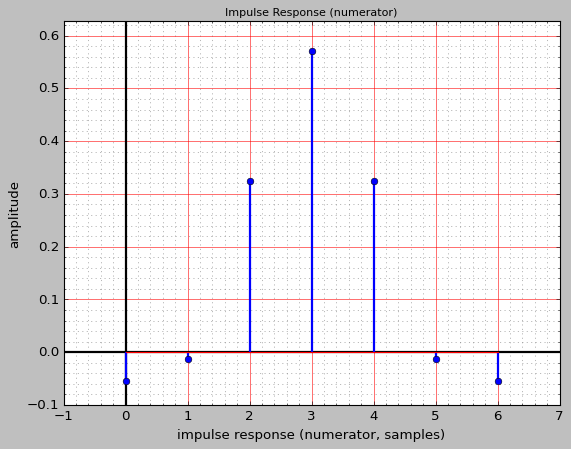

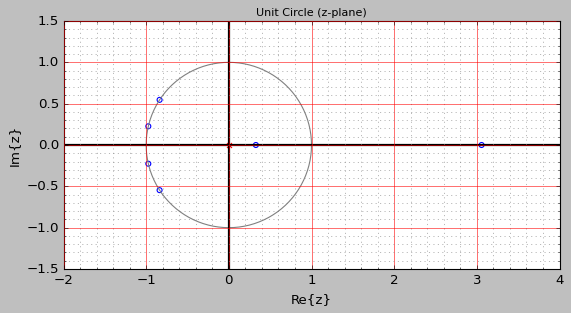

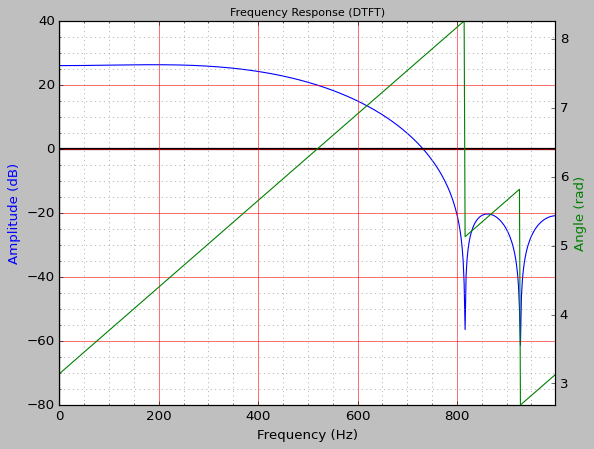

In [14]:
nd_zeroes, nd_poles, nd_gain = signal.tf2zpk(numerator, denominator)

print_polezero(nd_poles,nd_zeroes)
print_numden(numerator,denominator)

plot_ImpulseResponse(numerator)
plot_PoleZero(nd_zeroes, nd_poles)
plot_FreqResponse(nd_zeroes, nd_poles, 2000)

## 3.b Poles and Zeroes
First, convert the pole/zero values $\frac{Z(z)}{P(z)}=\frac{\Pi(z-Z_{i})}{\Pi(z-P_{i})}$ to numerator/denominator format $\frac{N(z)}{D(z)}=\frac{\sum a_{i}z^{-i}}{\sum b_{i}z^{-i}}$

This uses the Python SciPy library function:  ___zpk2tf(Z,P)___

Then use the defined plotting routines to give consistent output.

Numerator:
	+1.0000
	+1.8000
	+0.8200
Denominator:
	+1.0000
	-1.0000
	+0.5000


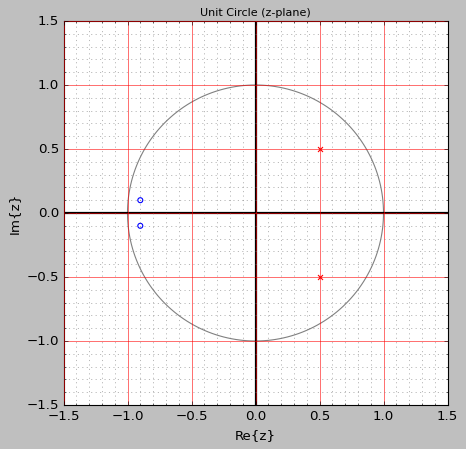

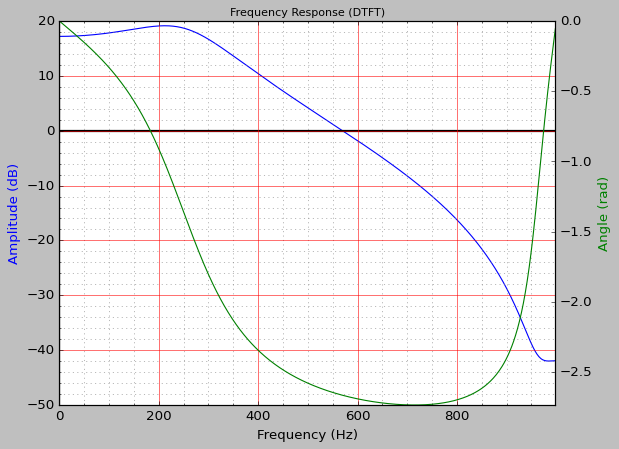

In [15]:
pz_numerator, pz_denominator = signal.zpk2tf(zeroes, poles, 1)

print_numden(pz_numerator,pz_denominator)

# Skipping impulse response here because the presence of a denominator makes the process more complicated ...
#plot_ImpulseResponse(pz_numerator)
plot_PoleZero(zeroes, poles)
plot_FreqResponse(zeroes, poles, 2000)

# 4 Questions:

1. The two filters differ in many ways. The graph in the numerator/denominator is very sharp and takes quick turns, while the graph
in the poles/zeros is more continous and less erratic in how it changes its angle/amplitude. We also use the impulse for the first but not for the second.
2. The spectral plots are showing how frequencies are being effected the individual filters and what the resultant amplitude would be.
3. If a pole or zero is inside the unit circle, they can be considered stable poles/zeros.
4. Filters could also change the phase and gain depending on the type of filter.

# 5. Rolling our own
First we setup the reading of the file

In [16]:
ezfile = 'evan.zeroes'
ezeroes = np.loadtxt(ezfile, comments='#', delimiter=',', dtype=complex, unpack=False)

epfile = 'evan.poles'
epoles = np.loadtxt(epfile, comments='#', delimiter=',', dtype=complex, unpack=False)
print_polezero(epoles, ezeroes)

enfile = 'evan.numerator'
enumerator = np.loadtxt(enfile, comments='#', delimiter=',', dtype=float, unpack=False)

edfile = 'evan.denominator'
edenominator = np.loadtxt(edfile, comments='#', delimiter=',', dtype=float, unpack=False) 
print_numden(enumerator, edenominator)

Zeroes:
	-0.5000 +0.5000j
	-0.5000 -0.5000j
Poles:
	+0.1000 +0.1000j
	+0.1000 -0.1000j
Numerator:
	-0.0340
	-0.0219
	+0.3390
	+0.9307
	+0.3140
	-0.2329
	-0.0840
Denominator:
	+0.5000
	+0.3000


# 5.a Graphing Numerator and Denominator

Zeroes:
	+3.8759 +0.0000j
	-1.9924 +1.3068j
	-1.9924 -1.3068j
	+0.4841 +0.0000j
	-0.6763 +0.0000j
	-0.3429 +0.0000j
Poles:
	-0.6000 +0.0000j
Numerator:
	-0.0340
	-0.0219
	+0.3390
	+0.9307
	+0.3140
	-0.2329
	-0.0840
Denominator:
	+0.5000
	+0.3000


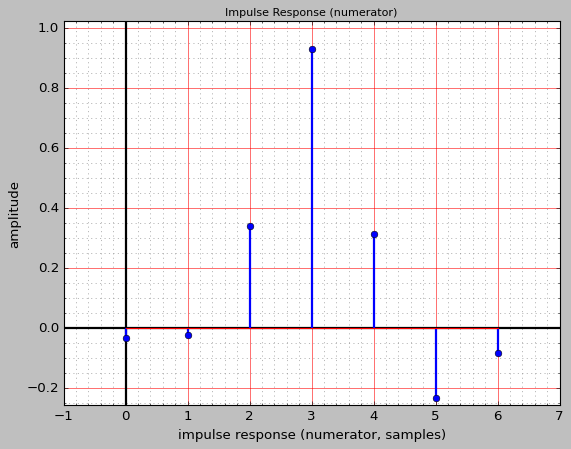

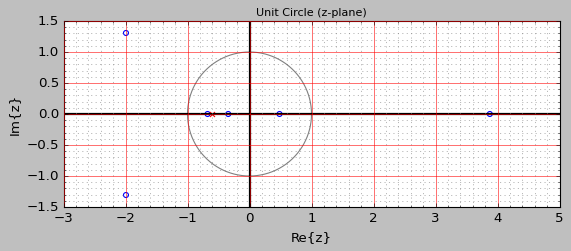

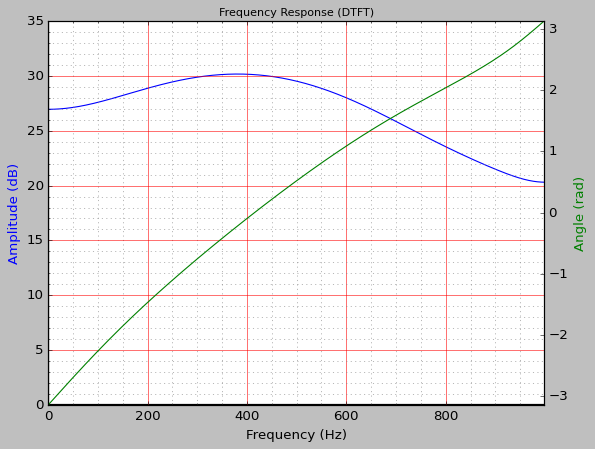

In [17]:
e_nd_zeroes, e_nd_poles, e_nd_gain = signal.tf2zpk(enumerator, edenominator)

print_polezero(e_nd_poles,e_nd_zeroes)
print_numden(enumerator,edenominator)

plot_ImpulseResponse(enumerator)
plot_PoleZero(e_nd_zeroes, e_nd_poles)
plot_FreqResponse(e_nd_zeroes, e_nd_poles, 2000)

# 5.b Graphing Poles and Zeroes

Numerator:
	+1.0000
	+1.0000
	+0.5000
Denominator:
	+1.0000
	-0.2000
	+0.0200


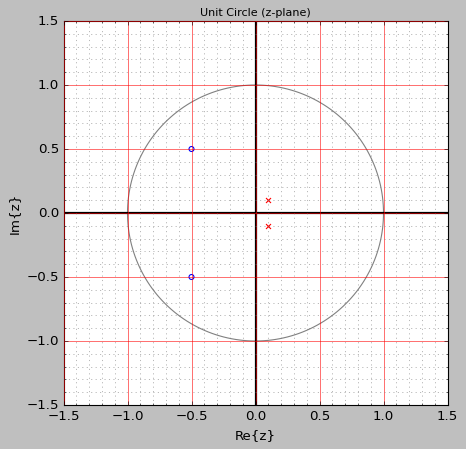

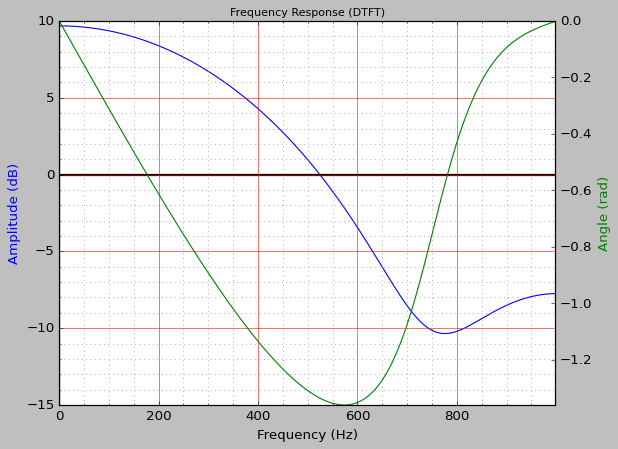

In [18]:
e_pz_numerator, e_pz_denominator = signal.zpk2tf(ezeroes, epoles, 1)

print_numden(e_pz_numerator,e_pz_denominator)

plot_PoleZero(ezeroes, epoles)

plot_FreqResponse(ezeroes, epoles, 2000)

# 6. Impulse Response

The plot_ImpulseResponse function is plotting the impulse in the time domian of the filter rather than in the frequency domain.
This becomes not possible to do if there are poles in the denominator as the response could become infinite and because it is infinite, it would also be considered unstable.